### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
path="C:\\Users\\HP\\Documents\\tested.csv"
df=pd.read_csv(path)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Data Preprocessing

In [11]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [12]:
#We drop Cabin column since it has many missing data.
df.drop(['Cabin'],axis=1,inplace=True)

In [13]:
#We replace the missing values of column Fare with mean
mean=df["Fare"].mean()
df["Fare"].replace(np.nan,mean,inplace=True)

In [14]:
df["Fare"].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
10.5000    11
           ..
8.7125      1
7.8208      1
8.5167      1
78.8500     1
22.3583     1
Name: Fare, Length: 170, dtype: int64

In [15]:
#We replace missing values from column Age with median
median=df["Age"].median()
df["Age"].replace(np.nan,median,inplace=True)

In [16]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [18]:
#Since we don't need the Name column here ,we can drop it
df.drop(['Name'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S
2,894,0,2,male,62.0,0,0,240276,9.6875,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,S


#### Turning Categorical Columns into quantitative variables

In [19]:
#Converting Sex column into quantitative variables by adding dummy variables
df_gender=pd.get_dummies(df['Sex'])
df = pd.concat([df, df_gender], axis=1)
print(df)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            892         0       3    male  34.5      0      0   
1            893         1       3  female  47.0      1      0   
2            894         0       2    male  62.0      0      0   
3            895         0       3    male  27.0      0      0   
4            896         1       3  female  22.0      1      1   
..           ...       ...     ...     ...   ...    ...    ...   
413         1305         0       3    male  27.0      0      0   
414         1306         1       1  female  39.0      0      0   
415         1307         0       3    male  38.5      0      0   
416         1308         0       3    male  27.0      0      0   
417         1309         0       3    male  27.0      1      1   

                 Ticket      Fare Embarked  female  male  
0                330911    7.8292        Q       0     1  
1                363272    7.0000        S       1     0  
2                240276    9.6

In [20]:
#Converting Embarked column into quantitative variables by adding dummy variables
df_embarked=pd.get_dummies(df['Embarked'])
df= pd.concat([df, df_embarked], axis=1)
print(df)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            892         0       3    male  34.5      0      0   
1            893         1       3  female  47.0      1      0   
2            894         0       2    male  62.0      0      0   
3            895         0       3    male  27.0      0      0   
4            896         1       3  female  22.0      1      1   
..           ...       ...     ...     ...   ...    ...    ...   
413         1305         0       3    male  27.0      0      0   
414         1306         1       1  female  39.0      0      0   
415         1307         0       3    male  38.5      0      0   
416         1308         0       3    male  27.0      0      0   
417         1309         0       3    male  27.0      1      1   

                 Ticket      Fare Embarked  female  male  C  Q  S  
0                330911    7.8292        Q       0     1  0  1  0  
1                363272    7.0000        S       1     0  0  0  1  
2  

In [21]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
female           uint8
male             uint8
C                uint8
Q                uint8
S                uint8
dtype: object

### EDA

In [22]:
# Group the DataFrame by 'sex' and calculate the mean survival rate
survival_by_sex = df.groupby(['Sex'])['Survived'].mean() * 100

for sex, percentage in survival_by_sex.items():
    print(f"Percentage of passengers who survived in {sex}: {percentage:.2f}%")

Percentage of passengers who survived in female: 100.00%
Percentage of passengers who survived in male: 0.00%


In [ ]:
# Group the DataFrame by 'Embarked' and calculate the mean survival rate
survival_mean_by_Embarked = df.groupby(['Embarked'])['Survived'].mean() * 100

for embarked, percentage in survival_mean_by_Embarked.items():
    print(f"Percentage of passengers who survived in {embarked}: {percentage:.2f}%")

In [23]:
# Group the DataFrame by 'Embarked' and calculate the mean survival rate
survival_by_Pclass = df.groupby(['Pclass'])['Survived'].mean() * 100

for pclass, percentage in survival_by_Pclass.items():
    print(f"Percentage of passengers who survived in {pclass}: {percentage:.2f}%")

Percentage of passengers who survived in 1: 46.73%
Percentage of passengers who survived in 2: 32.26%
Percentage of passengers who survived in 3: 33.03%


Text(0.5, 1.0, 'Sex Distribution by Survival Class')

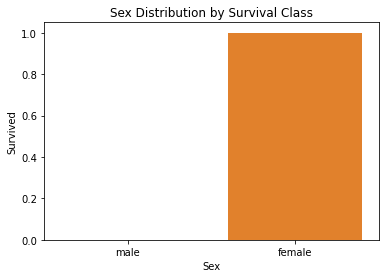

In [24]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.title('Sex Distribution by Survival Class')

##### Hence all survivors were female

Text(0.5, 1.0, 'Pclass Distribution by Survival Class')

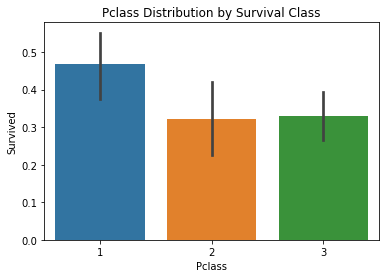

In [25]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('Pclass Distribution by Survival Class')

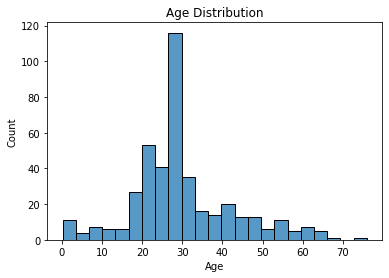

In [26]:
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Embarked Distribution by Survival Status')

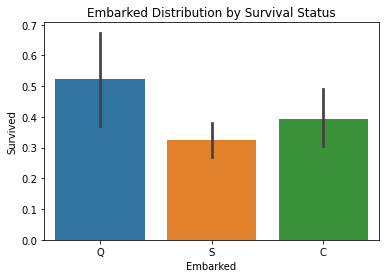

In [27]:
sns.barplot(x='Embarked',y='Survived',data=df)
plt.title('Embarked Distribution by Survival Status')

Text(0.5, 1.0, 'SibSp Distribution by Survival Status')

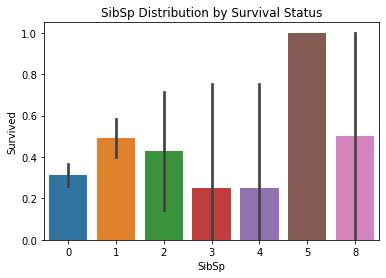

In [28]:
sns.barplot(x='SibSp',y='Survived',data=df)
plt.title('SibSp Distribution by Survival Status')